<a href="https://colab.research.google.com/github/mmadyda/OpenCV/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0'

In [2]:
(X_train, y_train),(X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape (10000,)
X_train[0] shape: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

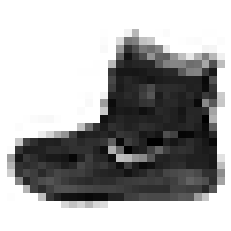

In [4]:
plt.imshow(X_train[0],cmap='gray_r')
plt.axis('off')

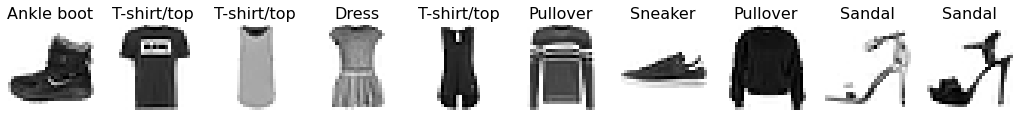

In [5]:
class_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(18,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)

plt.show()


In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

##Budowa modelu

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_train[0]

9

In [0]:
history = model.fit(X_train,y_train, epochs=10,batch_size=10,validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.5021 - accuracy: 0.8218 - val_loss: 0.4187 - val_accuracy: 0.8506
Epoch 2/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3791 - accuracy: 0.8624 - val_loss: 0.3852 - val_accuracy: 0.8604
Epoch 3/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3419 - accuracy: 0.8734 - val_loss: 0.3546 - val_accuracy: 0.8736
Epoch 4/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3157 - accuracy: 0.8823 - val_loss: 0.3516 - val_accuracy: 0.8725
Epoch 5/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2998 - accuracy: 0.8879 - val_loss: 0.3427 - val_accuracy: 0.8765
Epoch 6/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2864 - accuracy: 0.8938 - val_loss: 0.3585 - val_accuracy: 0.8697
Epoch 7/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.2725 - accuracy: 0.8982 - val_loss: 0.3540 - val_accurac

In [0]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.502108,0.821771,0.418653,0.850583,0
1,0.379103,0.862375,0.385180,0.860417,1
2,0.341896,0.873438,0.354587,0.873583,2
3,0.315681,0.882312,0.351594,0.872500,3
4,0.299820,0.887875,0.342747,0.876500,4
5,0.286371,0.893792,0.358524,0.869667,5
6,0.272539,0.898229,0.354004,0.875583,6
7,0.263336,0.901521,0.340795,0.882083,7
8,0.255503,0.902500,0.386230,0.876250,8
9,0.245632,0.907792,0.349464,0.881667,9


In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'],y=metrics['accuracy'], name='accuracy'),row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'],y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'],y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'],y=metrics['val_loss'],name='val_loss'),row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title ='Accuracy and loss')
fig.show()

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8726
0.8726000189781189


In [0]:
predictions = model.predict(X_test)
predictions

array([[0.000026053001, 0.000000001815, 0.000000620958, ..., 0.046986856   , 0.00000033144 , 0.95075077    ],
       [0.000006945303, 0.            , 0.99972075    , ..., 0.            , 0.000000000334, 0.            ],
       [0.00000000002 , 1.            , 0.            , ..., 0.            , 0.000000000004, 0.            ],
       ...,
       [0.000001159474, 0.            , 0.000000461188, ..., 0.            , 0.99995255    , 0.            ],
       [0.000000000003, 0.99992037    , 0.            , ..., 0.            , 0.000000086338, 0.            ],
       [0.0001723616  , 0.000000003925, 0.000034924367, ..., 0.011380173   , 0.0015647337  , 0.000009854178]], dtype=float32)

In [0]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000026,0.000000,0.000001,0.000000,0.000000,0.002234,0.000001,0.046987,0.000000,0.950751
1,0.000007,0.000000,0.999721,0.000000,0.000149,0.000000,0.000123,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.999915,0.000000,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.357137,0.000000,0.009558,0.000107,0.000590,0.000000,0.632607,0.000000,0.000001,0.000000


In [0]:
predictions_cls = model.predict_classes(X_test)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
prediction_classes_df = pd.DataFrame(prediction_classes)
prediction_classes_df

##Eksploracja predykcji

In [0]:
#@title Wybierz indeks dzjęcia:
idx = 9015 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
  color = 'green'
else:
  color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,y=predictions_df.iloc[:], marker_color = color))
fig.update_layout(width=800, title=f'Predykcja: {class_names}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data= (X_test[idx]*255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png',width=200)